In [6]:
from fastai.vision.all import *
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
p_path = Path("../data/processed/")

In [8]:
np.random.seed(42)
dls = ImageDataLoaders.from_folder(
    p_path,
    train="train", valid="valid",
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)

In [9]:
print("Classes:", dls.vocab)
print("Nº of classes:", dls.c)

Classes: ['american_football', 'basketball', 'bowling', 'cricket', 'golf', 'ice_hockey', 'lacross', 'pool', 'rugby', 'soccer', 'softball', 'tennis', 'volleyball']
Nº of classes: 13


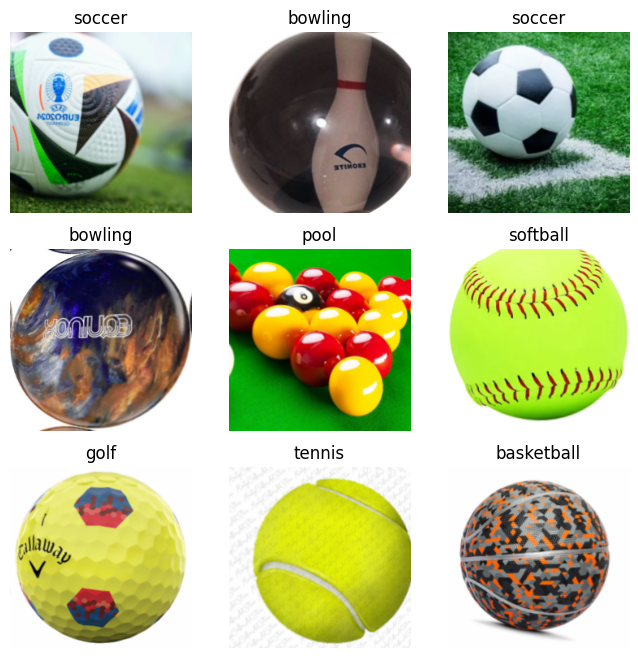

In [11]:
dls.show_batch(max_n=9, nrows=3, figsize=(8,8))

In [12]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.434033,1.647699,0.539683,03:31


epoch,train_loss,valid_loss,accuracy,time
0,1.350349,0.670099,0.833333,03:28
1,0.898517,0.532487,0.857143,04:14


c:\Users\matcg\Documents\GitHub\fastai-sportsball-classifier\.balls_venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


SuggestedLRs(valley=9.120108734350652e-05)

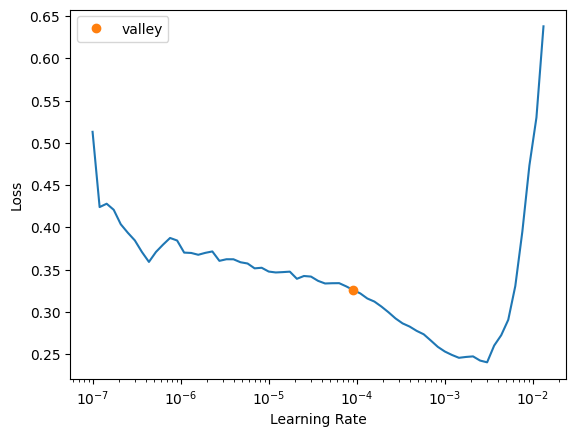

In [ ]:
# Finding optimal learning rate
learn.lr_find()

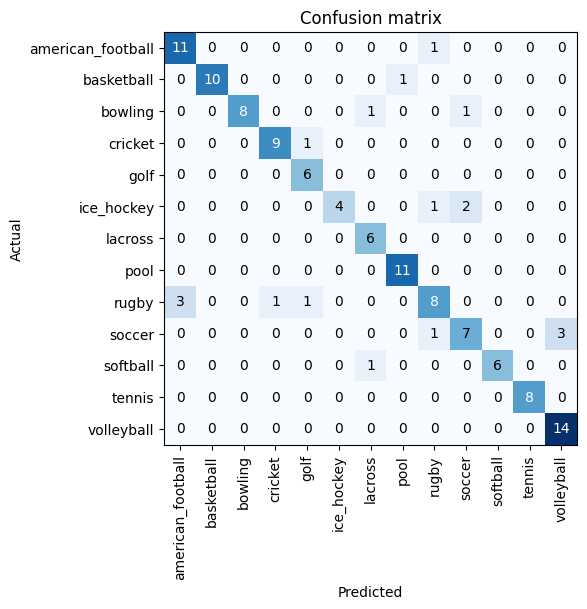

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6))

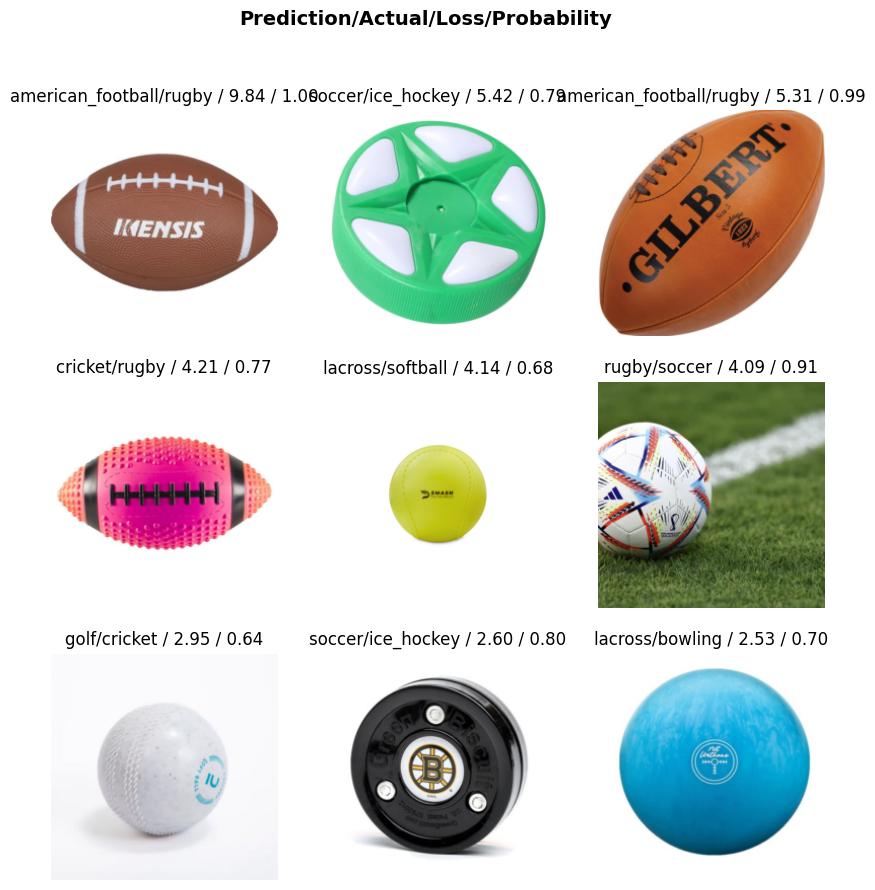

In [17]:
interp.plot_top_losses(9, nrows=3, figsize=(10,10))

In [18]:
img_path1 = p_path/'valid'/'american_football'/'american_football_4.png'
img_path2 = p_path/'valid'/'bowling'/'bowling_11.png'
img_path3 = p_path/'valid'/'soccer'/'soccer_51.jpg'

pred1, pred_idx1, probs1 = learn.predict(img_path1)
pred2, pred_idx2, probs2 = learn.predict(img_path2)
pred3, pred_idx3, probs3 = learn.predict(img_path3)

In [19]:
print(f"Predict1: {pred1} ({probs1[pred_idx1]:.2f})")
print(f"Predict2: {pred2} ({probs2[pred_idx2]:.2f})")
print(f"Predict3: {pred3} ({probs3[pred_idx3]:.2f})")


Predict1: american_football (1.00)
Predict2: bowling (0.98)
Predict3: volleyball (0.48)


In [ ]:
learn.export("../models/resnet34_experiment.pkl")